In [ ]:
import pandas as pd
import spacy
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud

%matplotlib inline

# Load the dataset
reviews_data = pd.read_csv("Reviews_dataset.csv")

# Ensure to select the appropriate column for the text data
reviews_data = reviews_data.iloc[:, 1]


In [ ]:
# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Define allowed POS types
allowed_types = ["NOUN", "ADJ", "VERB", "ADV"]

# Function for lemmatization
def lemmarization(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.pos_ in allowed_types]
    noun_chunks = [chunk.text for chunk in doc.noun_chunks]
    combined_tokens = list(itertools.chain(tokens, noun_chunks))

    # Remove stopwords and pronouns
    stopwords = nlp.Defaults.stop_words
    combined_tokens = [word for word in combined_tokens if word.lower() not in stopwords]
    combined_tokens = [word for word in combined_tokens if word not in ["I", "We", "They", "You", "It", "The"]]

    return combined_tokens

# Apply the lemmatization function
lemmatized_texts = [lemmarization(text) for text in reviews_data]

# Create a DataFrame with the lemmatized text
df = pd.DataFrame({'lemmatized_text': lemmatized_texts})

# Convert list of words to string for further processing
df['lemmatized_str'] = [' '.join(words) for words in df['lemmatized_text']]


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


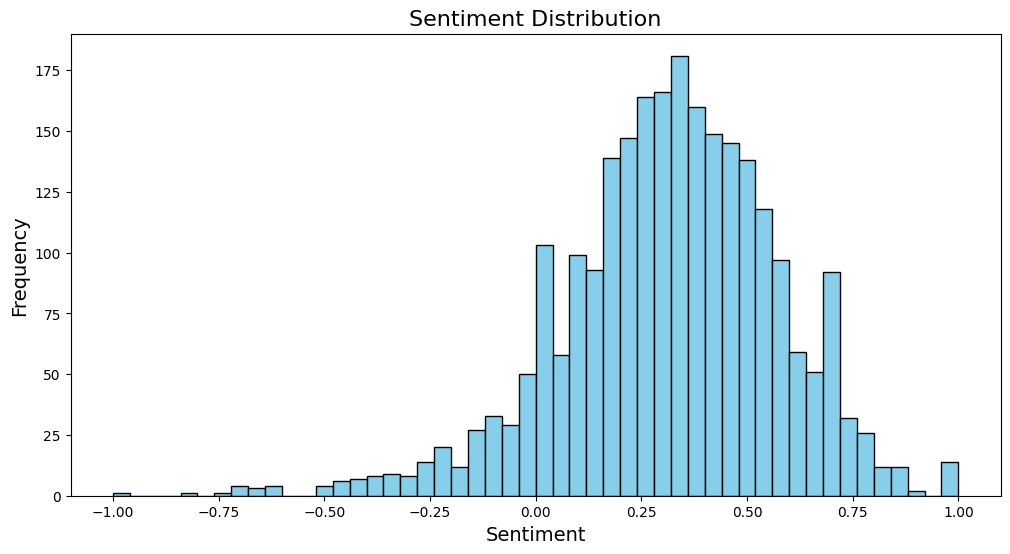

In [ ]:
# Compute sentiment polarity using TextBlob
df['sentiment'] = df['lemmatized_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

df.head()

plt.figure(figsize=(12, 6))
plt.hist(df['sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Sentiment Distribution', fontsize=16)
plt.show()


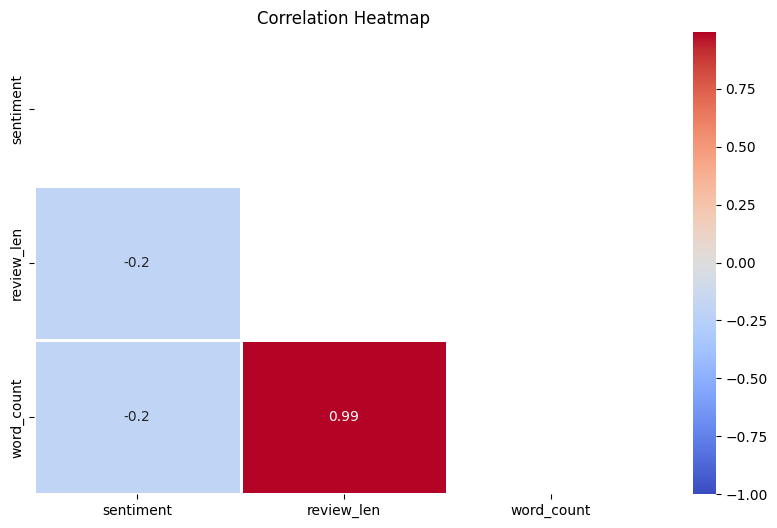

In [ ]:
# Calculate review length and word count
df['word_count'] = df['lemmatized_str'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemmatized_str'].astype(str).apply(len)

# Correlation heatmap
correlation = df[['sentiment', 'review_len', 'word_count']].corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cmap='coolwarm', annot=True, mask=mask, linewidths=1, vmin=-1)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Create a frequency distribution of words
allwords = list(itertools.chain(*[words.split() for words in df['lemmatized_str']]))
mostcommon = FreqDist(allwords).most_common(100)

print("Top 100 Most Common Words:\n", mostcommon)


Top 100 Most Common Words:
 [('the', 4297), ('food', 3972), ('good', 2831), ('place', 2156), ('a', 2044), ('restaurant', 1706), ('service', 1684), ('indian', 1248), ('The', 1141), ('taste', 1065), ('quality', 930), ('sweet', 896), ('south', 844), ('Indian', 739), ('time', 737), ('variety', 627), ('lunch', 626), ('coffee', 599), ('this', 586), ('visit', 573), ('A2B', 555), ('sweets', 546), ('serve', 535), ('hotel', 531), ('vegetarian', 514), ('meal', 503), ('price', 497), ('breakfast', 488), ('tasty', 474), ('order', 474), ('staff', 463), ('dosa', 436), ('item', 418), ('snack', 396), ('parking', 395), ('South', 395), ('table', 393), ('dinner', 388), ('their', 386), ('veg', 383), ('nice', 371), ('and', 359), ('dish', 355), ('family', 354), ('great', 344), ('try', 337), ('crowd', 333), ('clean', 325), ('items', 323), ('self', 313), ('quick', 307), ('north', 306), ('all', 305), ('people', 299), ('snacks', 298), ('available', 297), ('my', 296), ('eat', 291), ('experience', 285), ('wait', 26

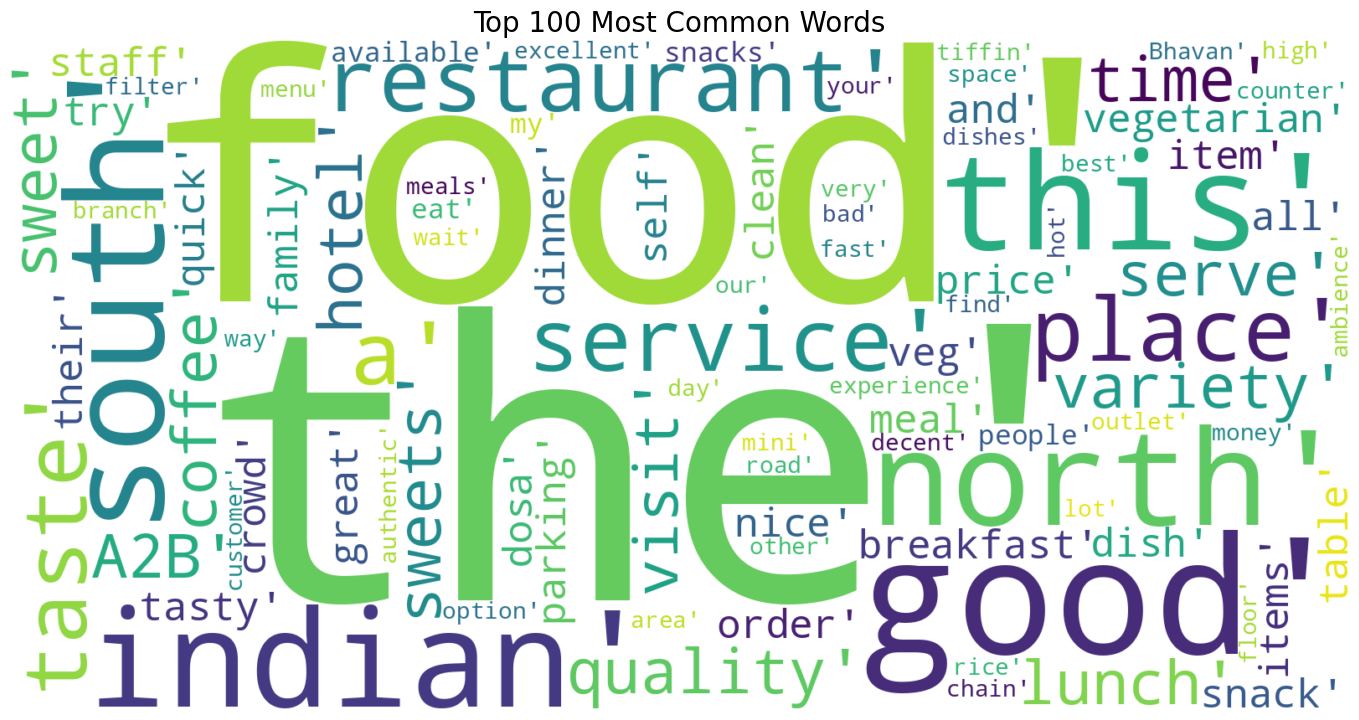

In [ ]:
# Generate a word cloud from the most common words
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(str(mostcommon))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=20)
plt.tight_layout(pad=0)
plt.show()


<ipython-input-20-4c76ed472b76>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_category', palette='coolwarm')


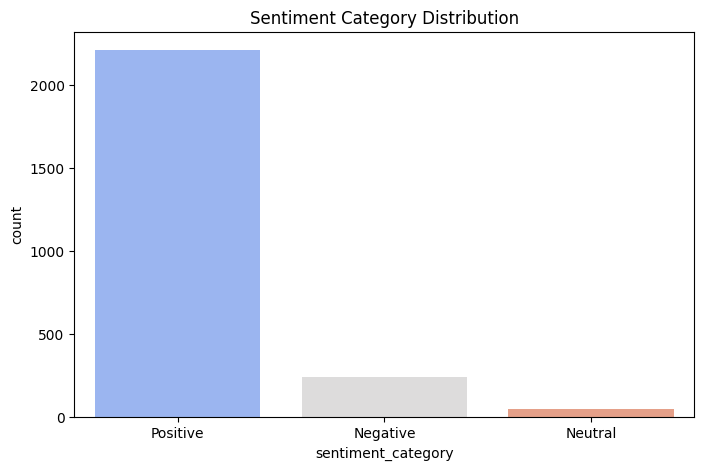

In [ ]:
# Define sentiment categories
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_category', palette='coolwarm')
plt.title('Sentiment Category Distribution')
plt.show()


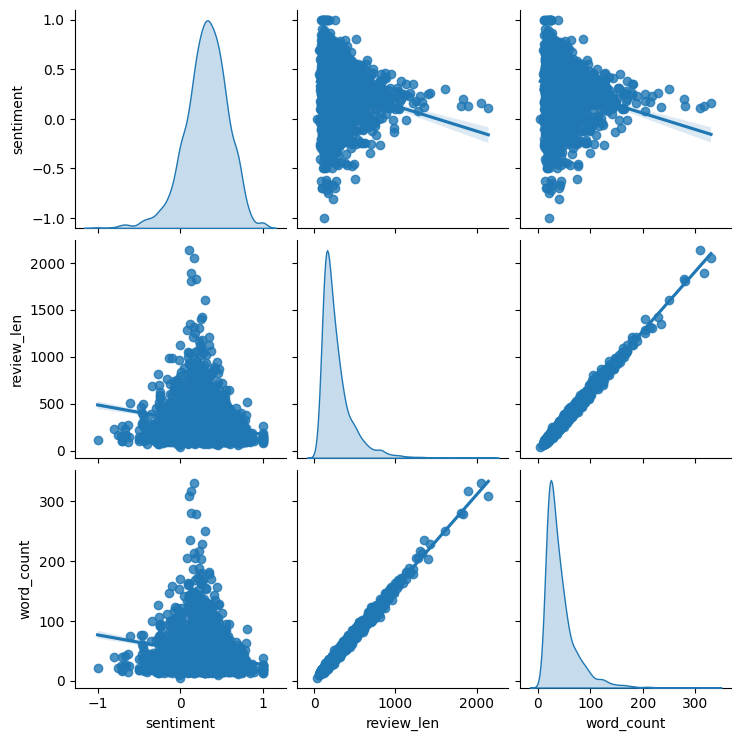

In [ ]:
sns.pairplot(df[['sentiment', 'review_len', 'word_count']], kind='reg', diag_kind='kde')
plt.show()


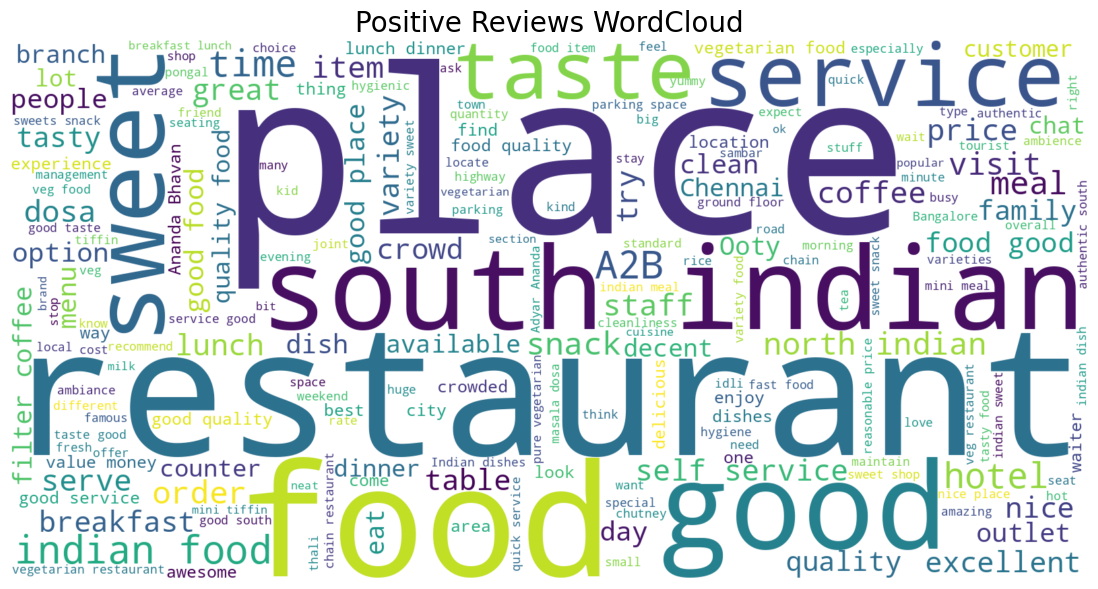

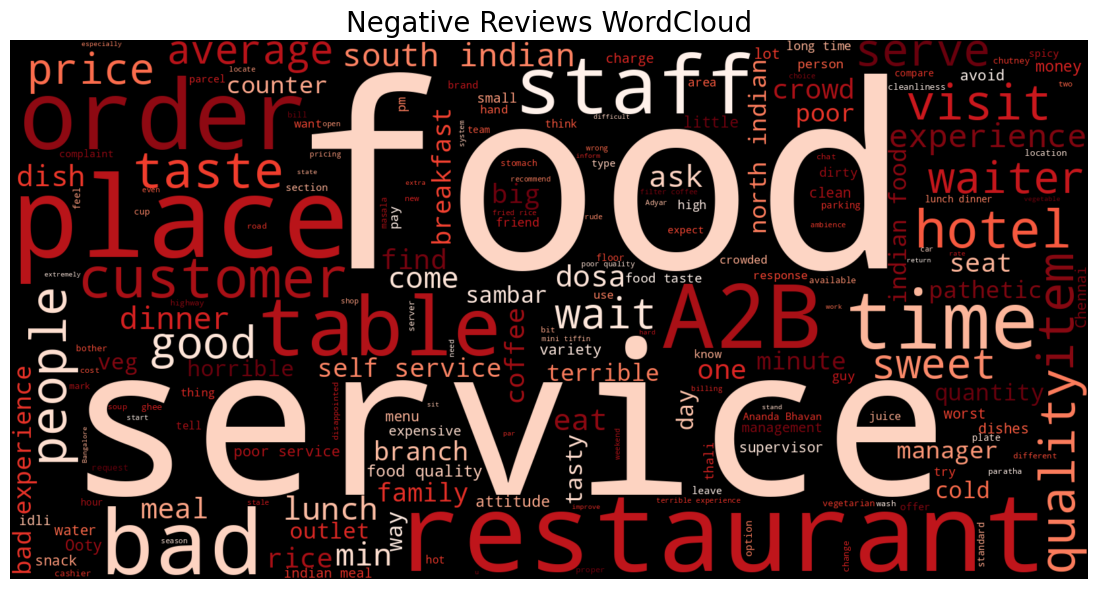

In [ ]:
positive_text = ' '.join(df[df['sentiment_category'] == 'Positive']['lemmatized_str'])
negative_text = ' '.join(df[df['sentiment_category'] == 'Negative']['lemmatized_str'])

# Positive word cloud
plt.figure(figsize=(15, 7))
positive_wc = WordCloud(width=1600, height=800, background_color='white').generate(positive_text)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews WordCloud', fontsize=20)
plt.show()

# Negative word cloud
plt.figure(figsize=(15, 7))
negative_wc = WordCloud(width=1600, height=800, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud', fontsize=20)
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-27-59b514e77be0>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=color)


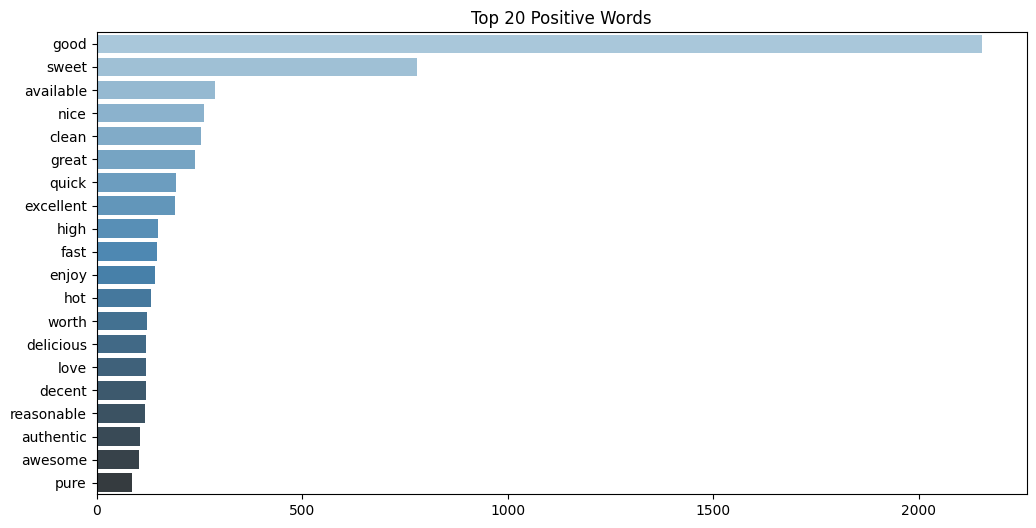

<ipython-input-27-59b514e77be0>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=color)


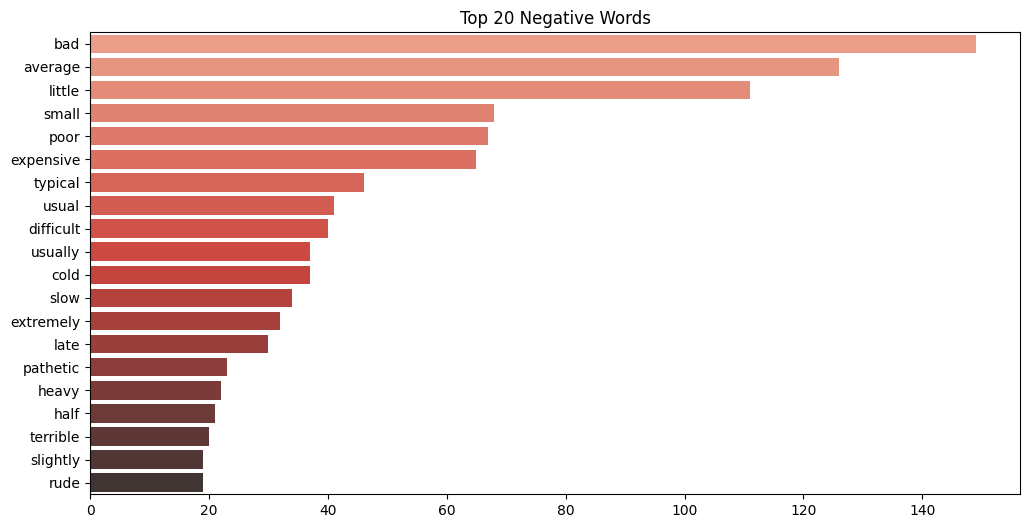

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.probability import FreqDist
import nltk

# Ensure the necessary resources are downloaded
nltk.download('punkt')

# Token-level sentiment analysis
positive_words = []
negative_words = []

# Check if lemmatized_text exists
if 'lemmatized_text' in df.columns:
    for text in df['lemmatized_text'].dropna():  # Handle potential NaN values
        for word in text:  # No need to call split(), it's already a list of words
            sentiment = TextBlob(word).sentiment.polarity
            if sentiment > 0.1:
                positive_words.append(word)
            elif sentiment < -0.1:
                negative_words.append(word)
else:
    print("Column 'lemmatized_text' is not found in the DataFrame.")

# Plot function for most common positive and negative words
def plot_common_words(words, title, color):
    if words:
        word_freq = FreqDist(words).most_common(20)
        words, counts = zip(*word_freq)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(counts), y=list(words), palette=color)
        plt.title(title)
        plt.show()
    else:
        print(f"No words to plot for {title}")

# Plot positive and negative words
plot_common_words(positive_words, 'Top 20 Positive Words', 'Blues_d')
plot_common_words(negative_words, 'Top 20 Negative Words', 'Reds_d')